**EX 8**

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17372, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 17372 (delta 42), reused 20 (delta 20), pack-reused 17313 (from 3)
Receiving objects: 100% (17372/17372), 16.25 MiB | 19.72 MiB/s, done.
Resolving deltas: 100% (11910/11910), done.
/content/yolov5


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-4-11 Python-3.11.12 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 183x275 5 dogs
Speed: 6.0ms pre-process, 293.7ms inference, 1.6ms NMS per image at shape (1, 3, 448, 640)


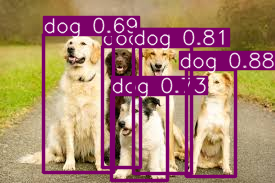

In [ ]:
import torch
from matplotlib import pyplot as plt
import cv2
from PIL import Image
import numpy as np

# Load the PyTorch YOLOv5s model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Load your image
img_path = '/image.jpeg'  # change to your image name
results = model(img_path)

# Show results in notebook
results.print()            # prints labels and confidence
results.show()             # opens image with boxes (might not work in Colab)


**Ex 8 with SSD**

In [ ]:
!pip install torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 27.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:01<00:00, 141MB/s]


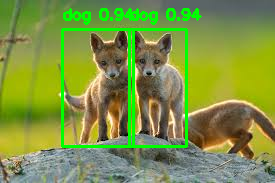

In [ ]:
import torch
from torchvision.models.detection import ssd300_vgg16, SSD300_VGG16_Weights
from torchvision import transforms
import cv2
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow

# Load the pre-trained SSD model
weights = SSD300_VGG16_Weights.DEFAULT
model = ssd300_vgg16(weights=weights)
model.eval()

# Load COCO labels
labels = weights.meta["categories"]

# Image transforms
preprocess = weights.transforms()

# Load and preprocess image
img_path = '/fox.jpg'  # Make sure this image exists
img = Image.open(img_path).convert("RGB")
input_tensor = preprocess(img).unsqueeze(0)  # shape: [1, 3, 300, 300]

# Predict
with torch.no_grad():
    outputs = model(input_tensor)[0]

# Load image for OpenCV display
img_cv = cv2.imread(img_path)

# Draw boxes for detections above confidence threshold
threshold = 0.5
for box, label, score in zip(outputs['boxes'], outputs['labels'], outputs['scores']):
    if score > threshold:
        x1, y1, x2, y2 = box.int().numpy()
        class_name = labels[label]
        cv2.rectangle(img_cv, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img_cv, f'{class_name} {score:.2f}', (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Show result in Colab
cv2_imshow(img_cv)


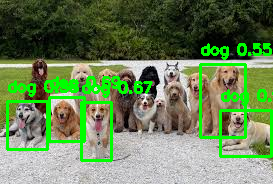

In [ ]:
import torch
from torchvision.models.detection import ssd300_vgg16, SSD300_VGG16_Weights
from torchvision import transforms
import cv2
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow

# Load the pre-trained SSD model
weights = SSD300_VGG16_Weights.DEFAULT
model = ssd300_vgg16(weights=weights)
model.eval()

# Load COCO labels
labels = weights.meta["categories"]

# Image transforms
preprocess = weights.transforms()

# Load and preprocess image
img_path = '/dog.jpg'  # Make sure this image exists
img = Image.open(img_path).convert("RGB")
input_tensor = preprocess(img).unsqueeze(0)  # shape: [1, 3, 300, 300]

# Predict
with torch.no_grad():
    outputs = model(input_tensor)[0]

# Load image for OpenCV display
img_cv = cv2.imread(img_path)

# Draw boxes for detections above confidence threshold
threshold = 0.5
for box, label, score in zip(outputs['boxes'], outputs['labels'], outputs['scores']):
    if score > threshold:
        x1, y1, x2, y2 = box.int().numpy()
        class_name = labels[label]
        cv2.rectangle(img_cv, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img_cv, f'{class_name} {score:.2f}', (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Show result in Colab
cv2_imshow(img_cv)


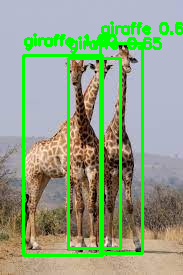

In [ ]:
import torch
from torchvision.models.detection import ssd300_vgg16, SSD300_VGG16_Weights
from torchvision import transforms
import cv2
from PIL import Image
import numpy as np
from google.colab.patches import cv2_imshow

# Load the pre-trained SSD model
weights = SSD300_VGG16_Weights.DEFAULT
model = ssd300_vgg16(weights=weights)
model.eval()

# Load COCO labels
labels = weights.meta["categories"]

# Image transforms
preprocess = weights.transforms()

# Load and preprocess image
img_path = '/giraffe.jpg'  # Make sure this image exists
img = Image.open(img_path).convert("RGB")
input_tensor = preprocess(img).unsqueeze(0)  # shape: [1, 3, 300, 300]

# Predict
with torch.no_grad():
    outputs = model(input_tensor)[0]

# Load image for OpenCV display
img_cv = cv2.imread(img_path)

# Draw boxes for detections above confidence threshold
threshold = 0.5
for box, label, score in zip(outputs['boxes'], outputs['labels'], outputs['scores']):
    if score > threshold:
        x1, y1, x2, y2 = box.int().numpy()
        class_name = labels[label]
        cv2.rectangle(img_cv, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img_cv, f'{class_name} {score:.2f}', (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Show result in Colab
cv2_imshow(img_cv)
